<a href="https://colab.research.google.com/github/michalis0/Business-Intelligence-and-Analytics/blob/master/week9%20-%20Regression2/%20Walkthrough_Regression_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Walkthrough : Regression 2

This week we continue working on regression.
We will show you how to choose the number of parameters, cross validation and 1-hot label encoding.

#1 First model

In [14]:
import matplotlib.pylab as plt
import pandas as pd
import numpy as np
%matplotlib inline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.preprocessing import PolynomialFeatures


## 1. Load the dataset

The Dataset we will be working on was extracted and modified from [Kaggle](https://www.kaggle.com/mohansacharya/graduate-admissions).


In [15]:
#Load the dataset
url = 'https://raw.githubusercontent.com/michalis0/Business-Intelligence-and-Analytics/master/data/Admissions_prediction.csv'
GAD = pd.read_csv(url, sep = ";", index_col= 'Serial No.').drop_duplicates() #Graduate Admissions Data

# Display a sample of the data
display(GAD.head())
#Print the data types
print(GAD.dtypes)
print("Data matrix shape: ", GAD.shape)
# display the columns names


,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
Serial No.,,,,,,,,
1,337,118,GOOD,4.5,4.5,9.65,YES,0.92
2,324,107,GOOD,4.0,4.5,8.87,YES,0.76
3,316,104,AVERAGE,3.0,3.5,8.00,YES,0.72
4,322,110,AVERAGE,3.5,2.5,8.67,YES,0.80
5,314,103,FAIR,2.0,3.0,8.21,NO,0.65


GRE Score              int64
TOEFL Score            int64
University Rating     object
SOP                  float64
LOR                  float64
CGPA                 float64
Research              object
Chance of Admit      float64
dtype: object
Data matrix shape:  (400, 8)


An overview of the columns:

 
 * `GRE Score`: GRE is a standardized admission test (out of 340)
 * `TOEFL Score`: English knowledge (out of 120)
 * `SOP`: Standard of Purpose (out of 5)
 * `LOR`: Letter of Recomendation (out of 5)
 * `CGPA`: College GPA (out of 10)
 * `RESEARCH`: Whether the applicant did research or not
 
 We will try to predict the chance of admit with the other variables.

## 2 Handling categorical variables for regression

First, let's focus on the `Research` column. The applicant was either active in research, or he was not. There are therefore only 2 possible values, hence we will assign 1 for YES and 0 for NO.



In [16]:
GAD['Research'] = GAD['Research'].replace(['NO', 'YES'], [0,1])

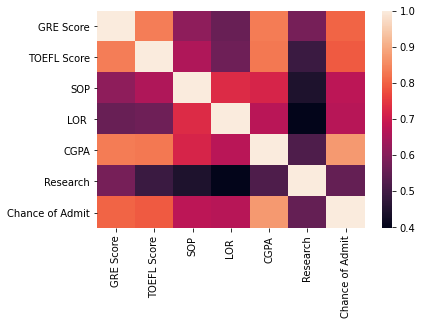

In [17]:
d = (sns.heatmap(GAD.corr()))

In [18]:
#We want to predict the chance of admission
y = GAD[['Chance of Admit']]

#With the help of the other columns
X = GAD.drop('Chance of Admit', axis = 1)

Now we need to handle the `University Ranking`. 
We will do both, one-hot and label encoding.
For label encoding, we can use Sklearn's LabelEncoder() function. 
For one hot encoding we will use pandas get dummy function.

In [19]:
#Label encoder
X_label = X.apply(LabelEncoder().fit_transform)

In [20]:
#1-hot encoding

#We create a DF with Dummy variables
dummies = pd.get_dummies(GAD["University Rating"])
X_hot = pd.concat([GAD, dummies], axis = 1)

#We drop the Rating column 
del X_hot["University Rating"]
del X_hot["Chance of Admit"]

#Have a look at what dummies actually looks like
dummies

,AVERAGE,EXCELLENT,FAIR,GOOD,POOR
Serial No.,,,,,
1,0,0,0,1,0
2,0,0,0,1,0
3,1,0,0,0,0
4,1,0,0,0,0
5,0,0,1,0,0
...,...,...,...,...,...
396,1,0,0,0,0
397,1,0,0,0,0
398,0,0,0,1,0


We will now build two models, one for 1-hot encoding and one for label encoding.

In [21]:
#Split Dataset
X_train_lab, X_test_lab, y_train_lab, y_test_lab = train_test_split(X_label, y, test_size=0.2, random_state=0, shuffle=True)
X_train_hot, X_test_hot, y_train_hot, y_test_hot = train_test_split(X_hot, y, test_size=0.2, random_state=0, shuffle=True)


#Fit the model label model
model_lab = LinearRegression()
model_lab.fit(X_train_lab, y_train_lab)

#Fit the one-hot model
model_hot = LinearRegression()
model_hot.fit(X_train_hot, y_train_hot)

#Calculate R2
hot_R2 = round(model_hot.score(X_test_hot, y_test_hot), 4)
lab_R2 = round(model_lab.score(X_test_lab, y_test_lab), 4)

print("R^2 Score using 1-hot encoding : ", hot_R2 )
print("R^2 Score using label encoding: ", lab_R2 )
print("The 1-hot encoding method yields an R^2 {}% higher than using label encoding.".format(round((hot_R2/lab_R2 -1)*100, 3)))


R^2 Score using 1-hot encoding :  0.7403
R^2 Score using label encoding:  0.7353
The 1-hot encoding method yields an R^2 0.68% higher than using label encoding.


In [22]:
#Now let's see how our model handles the test_data
#Model prediction from X_test
hot_predictions = model_hot.predict(X_test_hot)
label_predictions = model_lab.predict(X_test_lab)

# Compare the MAE the MSE and the R^2
hot_mae = mean_absolute_error(y_test_hot, hot_predictions)
hot_mse = mean_squared_error(y_test_hot, hot_predictions)
hot_r2 = r2_score(y_test_hot, hot_predictions)

lab_mae = mean_absolute_error(y_test_lab, label_predictions)
lab_mse = mean_squared_error(y_test_lab, label_predictions)
lab_r2 = r2_score(y_test_lab, label_predictions)

print("MAE %.2f" % lab_mae)
print("MSE %.2f" % lab_mse)
print("R^2 %.6f" % lab_r2)

print("MAE %.2f" % hot_mae)
print("MSE %.2f" % hot_mse)
print("R^2 %.6f" % hot_r2)


MAE 0.05
MSE 0.00
R^2 0.735324
MAE 0.05
MSE 0.00
R^2 0.740332


# Second model

We will now have a look at another model. We are going to use advertisement data. The task is to figure out how different means of advertisement influence the amount of sales of a product.

## 1. Loading the Data and Building the model

In [23]:
ad_df = pd.read_csv('https://raw.githubusercontent.com/michalis0/DataMining_and_MachineLearning/master/week4/data/Advertising.csv', index_col = "id")
# view the first 5 rows 
ad_df.head()

,TV,Radio,Newspaper,Sales
id,,,,
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [24]:
y = ad_df["Sales"]
X = ad_df.drop("Sales", axis = 1)

In [25]:

#First let's go for a linear multivariate regression
#You should know the drill by now
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, shuffle=True)

model = LinearRegression()
model.fit(X_train, y_train)
predictions = model.predict(X_test)

# 3. Performance metrics
mae = mean_absolute_error(y_test, predictions)
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print("Test scores: ")
print("MAE %.2f" % mae)
print("MSE %.2f" % mse)
print("R^2 %.2f" % r2)

print("Train metrics")
print("params: ", model.coef_)
print("constant: ", model.intercept_)
print("R^2 score: ", model.score(X, y))

Test scores: 
MAE 1.36
MSE 4.40
R^2 0.86
Train metrics
params:  [ 0.04458402  0.19649703 -0.00278146]
constant:  2.99489303049533
R^2 score:  0.8964076641629948


In [26]:
# Polynomial regression
poly = PolynomialFeatures(2)
X = np.array(ad_df[["TV", "Radio"]])
y = np.array(ad_df["Sales"])
X_poly = poly.fit_transform(X)

In [27]:
model = LinearRegression(fit_intercept=False) # we don't need fit intercept sice polynomial features function add a column of ones to the data 
model.fit(X_poly, y)
print("params: ", model.coef_)
print("R^2 score: ", model.score(X_poly, y))

params:  [ 5.19444187e+00  5.09930683e-02  2.65400299e-02 -1.09816273e-04
  1.07462080e-03  1.86076136e-04]
R^2 score:  0.986039101078374


##2. Hyperparameter tuning
Adding too many features may cause overfitting.

Text(0.5, 1.0, 'Errors & regression power')

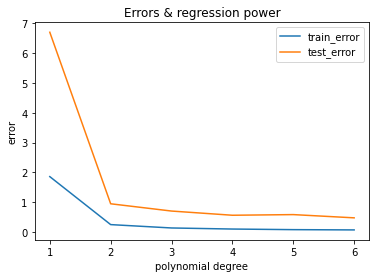

In [28]:
#Lists to save our errors
train_err = []
test_err = []

#We regress with powers 1 to 7
for f in range(1,7):
    poly = PolynomialFeatures(f)
    X_poly = poly.fit_transform(X)
    X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=10)
    model = LinearRegression(fit_intercept=False)
    model.fit(X_train, y_train)
    train_err.append(mean_squared_error(y_train, model.predict(X_train)))
    test_err.append(mean_squared_error(y_test, model.predict(X_test)))

#We plot the errorrs
plt.plot(range(1,7), train_err, label="train_error")
plt.plot(range(1,7), test_err, label="test_error")
plt.legend(fontsize=10)
plt.xlabel("polynomial degree")
plt.ylabel("error")
plt.title("Errors & regression power")


## 2.Cross Validation

The standard way to do a hyperparameter tuning is through cross validation. We need to make sure that our model has a has a good generalisation power and performs well on unseen data. Therefore we have to keep 3 different sets of data: training set, validation set and test set.

In [29]:
# we use ridge regression with built in cross validation
# by default sklearn does leave-one-out cross validation
from sklearn.linear_model import RidgeCV
ridge = RidgeCV(fit_intercept=False)
ridge.fit(X_train, y_train)

RidgeCV(alphas=array([ 0.1,  1. , 10. ]), cv=None, fit_intercept=False,
        gcv_mode=None, normalize=False, scoring=None, store_cv_values=False)

In [30]:
ridge.coef_

array([ 2.68051631e+00,  1.27911608e-01, -9.51943502e-02, -3.67339718e-03,
        3.44513133e-03,  4.08818090e-03,  8.86619091e-05, -7.69505277e-07,
       -1.73178996e-04,  5.48261101e-04,  6.47735596e-03,  5.84304333e-04,
        1.26481056e-04,  3.70554626e-05, -2.43447721e-05,  5.20751953e-01,
        2.74963379e-02,  1.58977509e-02,  5.43951988e-03,  1.57815218e-03,
        5.09440899e-04, -1.33187500e+02, -2.14765625e+01,  2.58789062e-01,
        8.12500000e-01,  2.88299561e-01,  8.12549591e-02,  2.43968964e-02])

In [31]:
# best regularizer
ridge.alpha_

0.1